# Setup

In [9]:
import numpy as np
import openai
import llmlex
import matplotlib.pyplot as plt
import time

In [10]:
funcs = [lambda x: (np.abs(np.sin(x))**0.5),
            lambda x: np.exp(( 1.83169 + (-3.35509 * (1 / x)))),
            lambda x: (x**3.),
            lambda x: ((1.44439 + (x**0.5)) * (np.pi + np.log(x))),
            lambda x: (3.09529 * (x**3.)),
            lambda x: ((np.pi + (x**3.))**2),
            lambda x: (51.2288 * np.cos((1.18219 * x))),
            lambda x: (-55.0512 * (1.0+(x**0.5))),
            lambda x: x,
            lambda x: (-0.0126997 + np.exp(np.cos(x))),
            lambda x: (1.54251 + (-1. * x)),
            lambda x: ((np.exp(2*x))),
            lambda x: (4.01209 + np.exp(x)),
            lambda x: ((-1. * np.pi) + (0.729202 * (x**0.5))),
            lambda x: (1.99594 + x + (-3. * ( x**3.))),
            lambda x: np.log(x+1),
            lambda x: np.sin(np.log((4.1746 * (1 / x)))),
            lambda x: (4.67315 + np.cos(np.exp(x))),
            lambda x: np.exp((-x))+2*np.exp(-3*x),
            lambda x: ((x**-3.) * np.sin(x))
            ]

print(len(funcs))

20


In [11]:

# model = "llama3.3:70b-instruct-fp16" ### this one crashed Jim's 128GB MBP
model = "llama3.3:70b-instruct-q4_K_M"

client = openai.OpenAI(
    base_url="http://0.0.0.0:11434/v1",
    api_key="ollama" # This can be any non-empty string
)

# Run 1

## Search

In [12]:
xVals = np.linspace(0.1, 5, 100)
count = 0
population_size = 25
num_of_generations = 10
res_list = []

# only finish this block if 'results_{model}.pkl' does not exist
try:
    import pickle
    with open(f"results_{model}.pkl", 'rb') as f:
        res_list, compute_times = pickle.load(f)
    print("Results already computed. Exiting.")
    
except FileNotFoundError:
    print("Results not found. Proceeding with computation.")

    compute_times = []
    for func in funcs:
        start_time = time.time()
        print(f"Function {count}")
        count+=1
        y = func(xVals)
        fig, ax = plt.subplots()
        plt.xticks([xVals[0], xVals[-1]], ['%2.f' % xVals[0], '%2.f' % xVals[-1]])
        plt.yticks([min(y), max(y)], ['%2.f' % min(y), '%2.f' % max(y)])
        base64_image = llmlex.images.generate_base64_image(fig, ax, xVals, y)
        plt.show()
        if 'gpt' in model: start = llmlex.llm.check_key_limit(client)
        res = llmlex.run_genetic(client, base64_image, xVals, y, population_size,num_of_generations, 
                                temperature=1., model=model, system_prompt=None, elite=True, use_async=True, exit_condition=1e-7)
        res_list.append(res)
        compute_times.append(time.time() - start_time)
        if 'gpt' in model: print(f"Credits spent: {start - llmlex.llm.check_key_limit(client)}")


Results already computed. Exiting.


## Compare

Function 0
(params[0] * np.exp(-params[1]*x) + params[2] * np.exp(-params[3]*x**2)) * (np.sin(params[4]*x + params[5]) + params[6]*np.cos(params[7]*x + params[8])) * (1 + params[9]*np.tanh(params[10]*x + params[11])) + params[12] * x**params[13] + params[14] / (1 + np.exp(-params[15]*(x-params[16]))) + params[17] * np.sinh(params[18]*x)*np.exp(-params[19]*x) + params[20] * np.cos(params[21]*x)*np.exp(-params[22]*x) + params[23]
[-1.01903077e-01 -2.52806793e-01  5.06168202e+02  7.69397249e-01
  2.96271870e+00  5.05522486e+00  3.63643046e+01 -7.48408587e-03
 -1.61913222e+00  9.99892824e-01  2.41237399e+01 -7.54292360e+01
  3.06602507e+01  9.66938025e-01 -5.41741748e+01  7.34394653e-01
  4.25185879e+00  5.49536278e+02 -5.28756653e-02  4.95215422e-02
 -3.90725146e-03 -3.26060339e+00 -1.04072921e+00  2.49323942e+00]
-8.573479863116518e-05


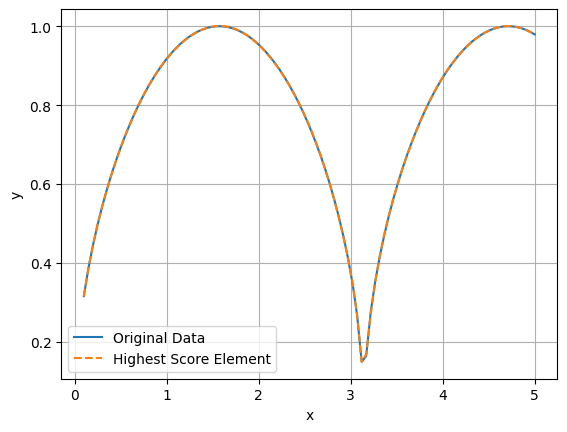

Function 1
params[0] * np.exp(-params[1]*x) * (np.cos(params[2]*x + params[3]) + params[4]*np.sin(params[5]*x + params[6])) + params[7] * x**params[8] + params[9] / (1 + np.exp(-params[10]*(x-params[11]))) + params[12] * np.log(1 + params[13]*x)
[ 0.37219928  1.68663893  3.05865024 -0.26834168  3.00040457  1.24982836
  0.10994001 -3.47511748  0.79813626 -0.40344135 -2.23312308  1.87680905
 28.95106901  0.14456129]
-1.7413769981544647e-08


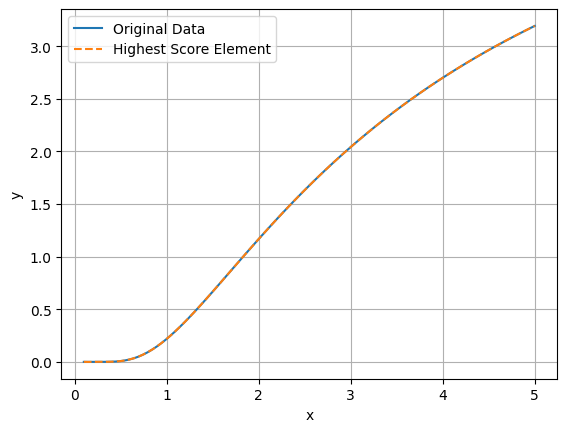

Function 2
params[0] * np.exp(-params[1] * x**2) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**params[6]
[8.24215352e-10 1.53661254e+00 7.12891989e-10 1.85605823e+00
 3.99958937e+00 1.00000000e+00 3.00000000e+00]
-6.718618015458371e-22


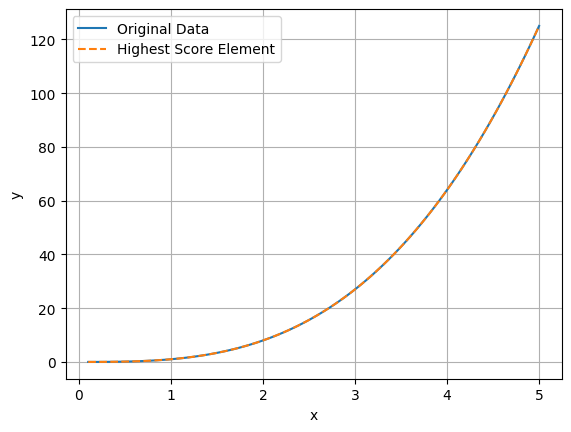

Function 3
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x) + params[4] * x**params[5] + params[6] / (1 + np.exp(-params[7]*(x-params[8])))
[-2.42082603e+01  5.45637887e-02  8.54296484e-03  1.08133526e+00
  1.25880306e+01  2.19223593e-01  1.80065821e+01  1.65774957e+01
 -2.52177119e-01]
-1.1181331416310059e-09


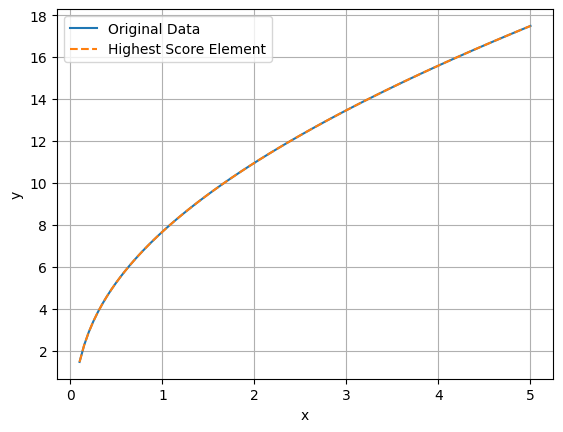

Function 4
params[0] * np.exp(-params[1]*x) * np.sin(params[2]*x + params[3]) + params[4] * x**params[5] + params[6]
[1.12049156e-10 2.70398764e+00 3.24805056e-01 1.09764520e+01
 3.09529000e+00 3.00000000e+00 9.27633447e-11]
-7.154708086255854e-25


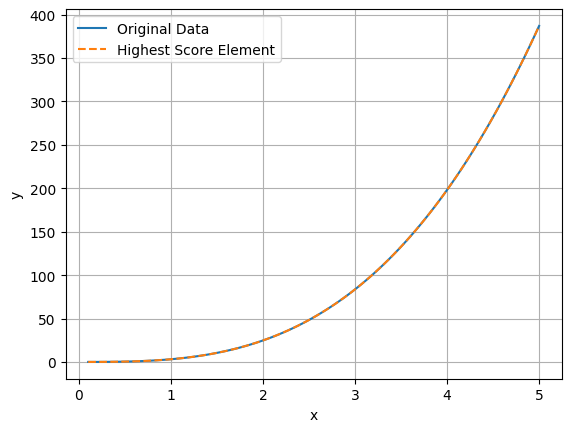

Function 5
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x) + params[4] * x**params[5] + params[6] * np.cos(params[7]*x) + params[8] * x**params[9] / (1 + params[10]*x**params[11])
[ 9.86956346e+00  1.56469719e-03  1.32982015e+00  1.16157958e-02
  1.00000024e+00  5.99999990e+00  4.06086332e-05  1.20720023e+00
  2.12293849e+00  2.99999777e+00 -6.62124407e-01  1.07901160e-08]
-7.802600847756643e-21


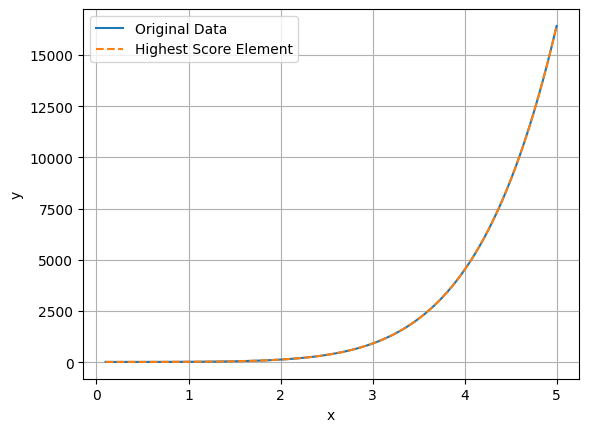

Function 6
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x + params[4])
[5.12079765e-06 4.48275851e+01 5.12288000e+01 1.18219000e+00
 7.85398163e+00]
-2.888111448486553e-20


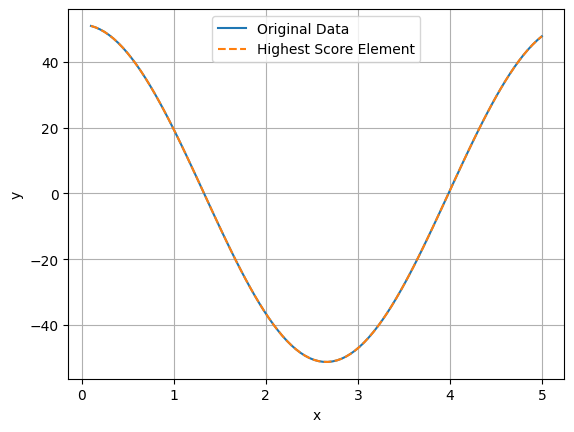

Function 7
params[0] * np.exp(-params[1]*x) * np.cos(params[2]*x + params[3]) + params[4] * x**params[5] + params[6]
[ 1.13768684e+00  8.75635480e-01  2.68000803e-06  1.57079489e+00
 -5.50511954e+01  5.00000031e-01 -5.50512041e+01]
-1.1042288768599033e-17


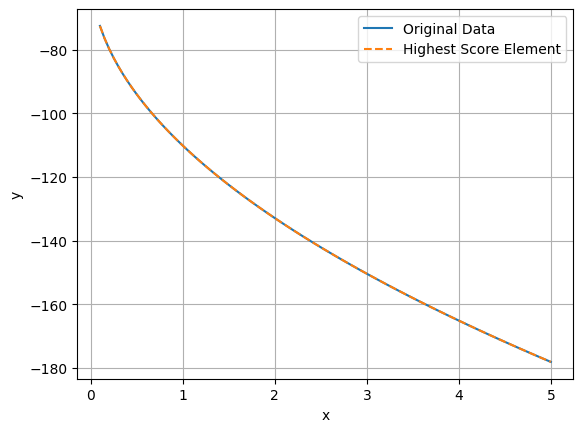

Function 8
params[0] * np.sin(params[1] * x + params[2]) + params[3] * x + params[4]
[-6.02230038e-09  7.79501749e-01  1.13563124e+00  9.99999997e-01
  8.62528871e-09]
-5.544063284326676e-19


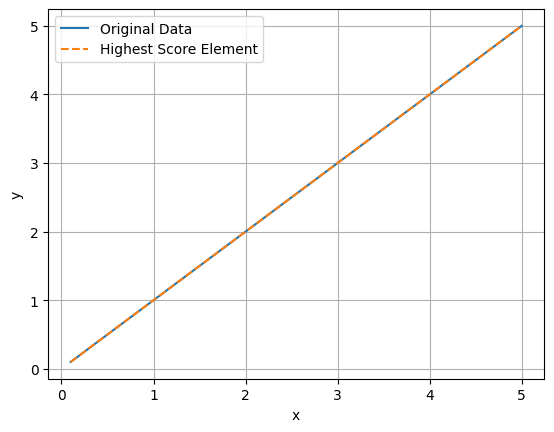

Function 9
(params[0] * np.exp(-params[1]*x) + params[2] * np.exp(-params[3]*x**2)) * (np.sin(params[4]*x + params[5]) + params[6]*np.cos(params[7]*x)) + params[8] * x**2 + params[9] / (1 + np.exp(-params[10]*(x-params[11]))) + params[12] * x**3
[ 0.77339813 -0.30607561  1.53189578  0.23145008  0.94855873 -4.43535237
  0.11466131  1.78527308  0.19400037  2.03313466  1.75866805  1.1894864
 -0.05030164]
-3.790854297136548e-09


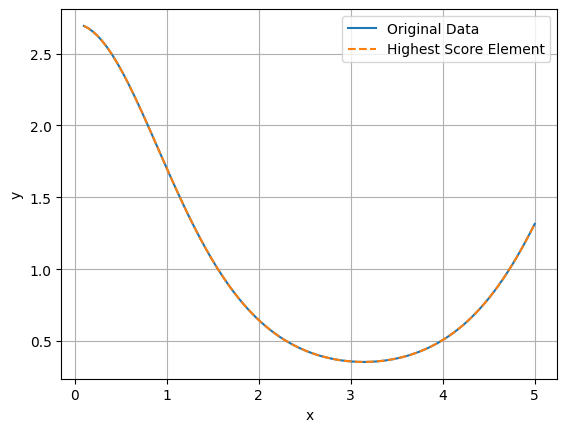

Function 10
params[0] * np.sin(params[1] * x + params[2]) + params[3] * x + params[4]
[-4.08384437e-11  1.00032212e+00  1.00000001e+00 -1.00000000e+00
  1.54251000e+00]
-1.2528314030017948e-22


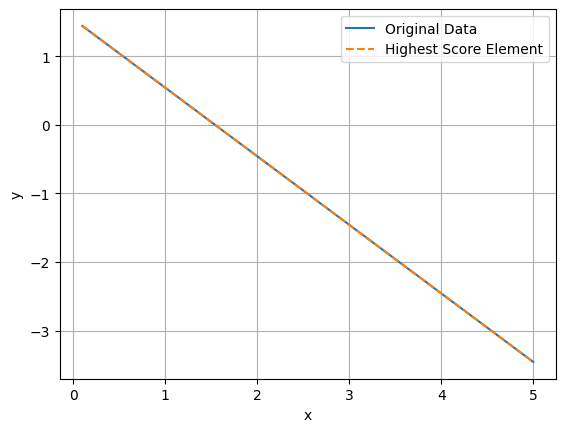

Function 11
params[0] * np.exp(-params[1]*x) + params[2] * np.cos(params[3]*x)
[ 1.00000000e+00 -2.00000000e+00 -2.23110223e-09 -3.12738706e+00]
-7.914548692039957e-23


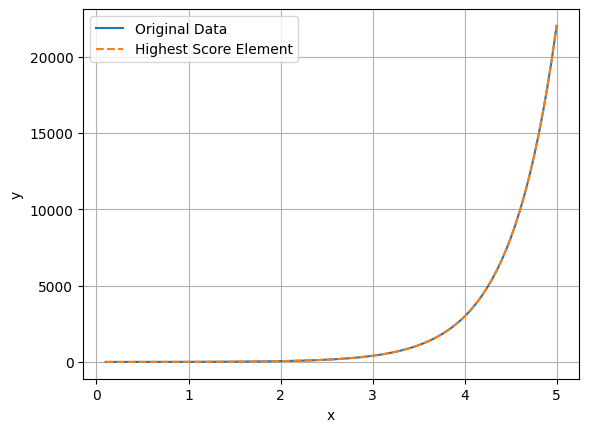

Function 12
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x + params[4]) * np.exp(-params[5]*x) + params[6] * x**params[7] + params[8] * np.cos(params[9]*x + params[10])
[ 1.00000000e+00 -1.00000000e+00  2.48827166e+02 -1.10204565e-08
  1.61247019e-02 -6.83393372e-07  1.03637544e-12  3.07401097e+00
  8.42991188e-13  1.63867651e+00  2.99419201e+00]
-5.076443184613652e-29


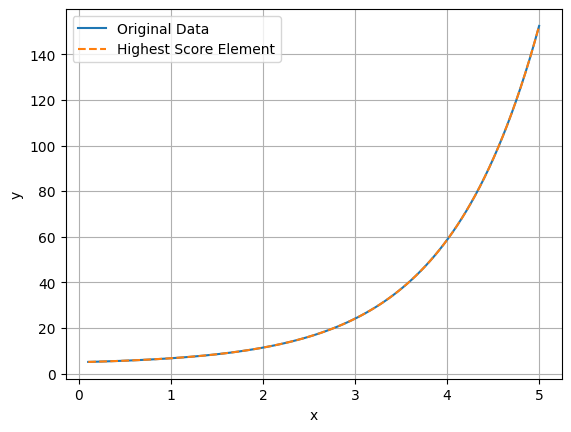

Function 13
params[0] * np.exp(-params[1]*x) + params[2] * x**params[3] + params[4] * np.cos(params[5]*x) + params[6] * np.sin(params[7]*x) + params[8] * x**params[9] / (1 + params[10]*x**params[11])
[-2.06152159e-03  4.94911364e+00  2.21171142e-01  7.04616204e-01
 -2.36031145e-07  1.01963099e+00 -9.96538676e-05  1.10001004e+00
 -3.09119802e+00 -2.48996857e-03  1.73816436e-01  5.18467656e-01]
-1.1981564178309423e-11


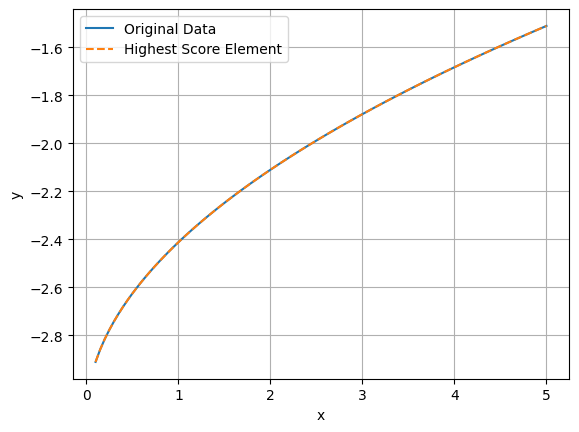

Function 14
params[0] * np.exp(-params[1] * x) * np.sin(params[2] * x + params[3]) + params[4] * x**3 + params[5] * x + params[6]
[-1.70917674e-06  1.23832478e+00  6.96454422e-02  3.68275246e-02
 -3.00000000e+00  9.99999974e-01  1.99594008e+00]
-1.8780069520508124e-21


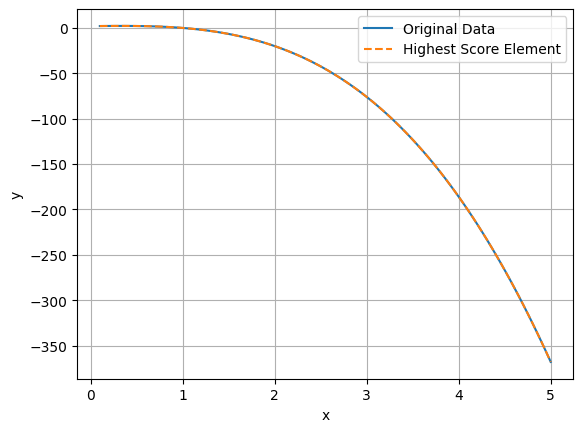

Function 15
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x) + params[4] * x**2 + params[5] / (1 + np.exp(-params[6]*(x-params[7])))
[-0.54071813  1.34137307 -0.03208916  0.99076764  0.01507084  1.41241624
  0.87632353  0.54114449]
-2.3286114370080213e-08


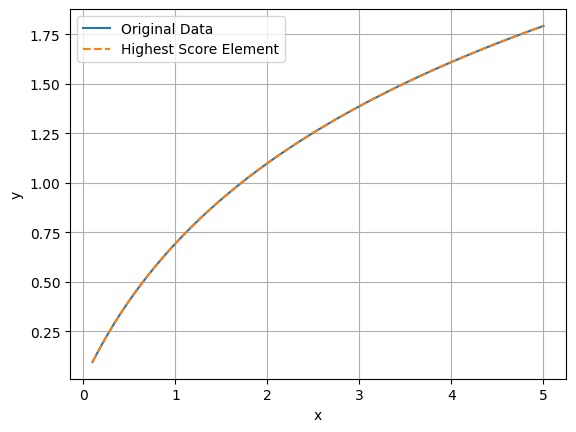

Function 16
params[0] * np.exp(-params[1]*x) * (np.sin(params[2]*x) + params[3]*np.cos(params[4]*x)) + params[5] * (1 - np.exp(-params[6]*x))**params[7] + params[8] * x**params[9] / (1 + params[10]*x**params[11] + params[12]*x**params[13])
[ 1.71020357e+01  2.01446673e+00  9.35400192e-02 -7.82486440e-02
 -9.37039422e-02 -1.64761906e+00  2.35796085e+00  1.59665579e+00
  1.39607605e+02  2.11491345e+00  1.57302489e+01  3.08662618e+00
  4.24143985e+01  1.64548423e+00]
-2.6307372946732244e-10


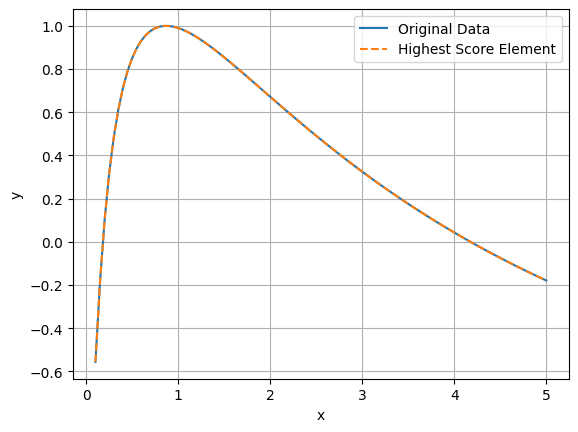

Function 17
(params[0] * np.exp(-params[1]*x**params[2]) + params[3] * x**params[4] * np.sin(params[5]*x + params[6])) / (1 + params[7]*x**params[8] + params[9]*np.exp(-params[10]*x)) + params[11] * np.cos(params[12]*x + params[13]) * np.exp(-params[14]*x) + params[15] * x**params[16] / (1 + params[17]*x**params[18] + params[19]*np.tanh(params[20]*x)) + params[21] * np.sinh(params[22]*x) * np.cos(params[23]*x + params[24]) + params[25] * x**params[26] * np.exp(-params[27]*x**params[28]) + params[29] * (1 / (1 + np.exp(-(x-params[30])/params[31]))) * np.sin(params[32]*x + params[33]) + params[34] * np.tanh(params[35]*x) * np.sin(params[36]*x + params[37]) * np.exp(-params[38]*x**params[39])
[ 1.31677654e+01  9.39992814e-06  1.62452105e+01  5.05176911e+00
  1.75114585e+00  4.77129897e+00 -7.16697535e-01  3.02436721e-08
  1.54556034e+01  5.30673758e+00  7.73692213e-01  1.40718975e-01
  8.77250878e+00 -4.65206410e+00 -2.31665896e-01  1.80489586e+00
  3.23847367e+00  6.66172383e-07  1.45020

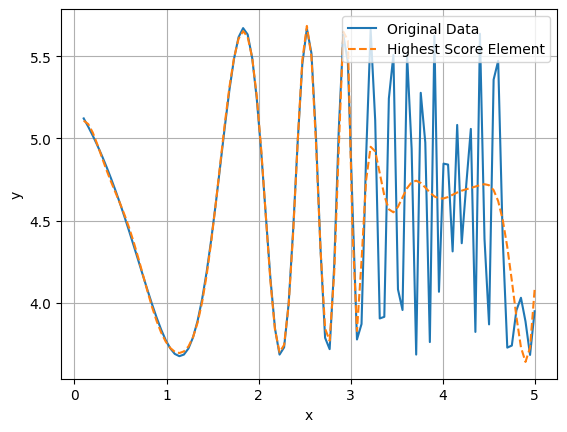

Function 18
params[0] * np.exp(-params[1]*x) + params[2] * np.sin(params[3]*x + params[4]) * np.exp(-params[5]*x) + params[6] * x**params[7] / (1 + params[8]*x**params[9])
[ 2.00000027e+00  2.99999988e+00 -1.39041565e+00 -2.21687124e-04
  3.94425611e+00  9.99785678e-01  7.79022392e-08  6.43932386e-01
  1.23774175e+00  2.18197315e+00]
-1.3723435905512062e-17


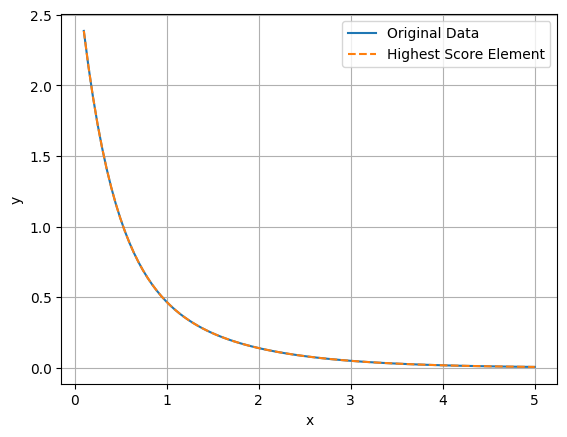

Function 19
params[0] * np.sinh(params[1]*x + params[2]) + params[3] * np.exp(-params[4]*x**2) + params[5] * np.cos(params[6]*x) + params[7] * x**(params[8]) + params[9] / (1 + np.exp(-(params[10] * (x - params[11]))))
[ 3.82502690e-02  5.22151922e-01 -4.59305897e+00  7.26348597e-03
  3.21894666e-01  2.40392345e-03  1.14903210e+00  1.00000405e+00
 -1.99999858e+00  3.27208573e+01 -6.07455137e-01 -4.76759350e+00]
-8.15973053014396e-11


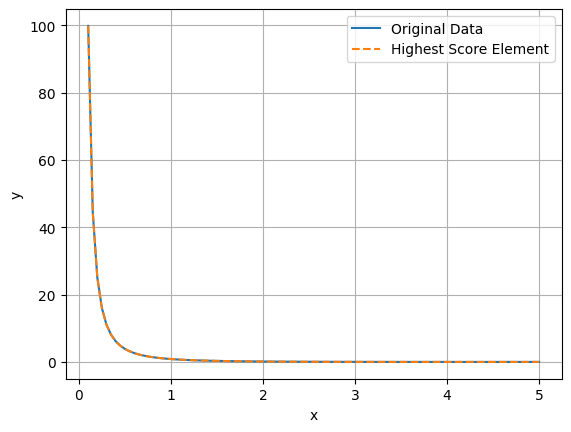

In [13]:
for index in range(len(res_list)):
    print(f"Function {index}")
    y = funcs[index](xVals)
    res = res_list[index]
    highest_score_element = max((item for sublist in res for item in sublist), key=lambda item: item['score'])
    print(highest_score_element['ansatz'])
    print(highest_score_element['params'])
    print(highest_score_element['score'])

    # Extract the parameters and the ansatz function from the highest_score_element
    params = highest_score_element['params']
    ansatz = highest_score_element['ansatz']

    # Define the ansatz function
    def ansatz_function(x, params):
        return eval(ansatz)

    # Plot the original data
    plt.plot(xVals, y, label='Original Data')

    # Plot the highest score element
    plt.plot(xVals, ansatz_function(xVals, params), label='Highest Score Element', linestyle='--')

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
# print compute times in minutes and seconds 
for time in compute_times:
    minutes = int(time // 60)
    seconds = int(time % 60)
    print(f"Compute time: {minutes} minutes and {seconds} seconds")

Compute time: 132 minutes and 42 seconds
Compute time: 10 minutes and 28 seconds
Compute time: 5 minutes and 19 seconds
Compute time: 5 minutes and 50 seconds
Compute time: 5 minutes and 24 seconds
Compute time: 10 minutes and 18 seconds
Compute time: 2 minutes and 16 seconds
Compute time: 5 minutes and 17 seconds
Compute time: 5 minutes and 7 seconds
Compute time: 17 minutes and 47 seconds
Compute time: 2 minutes and 28 seconds
Compute time: 2 minutes and 39 seconds
Compute time: 12 minutes and 33 seconds
Compute time: 12 minutes and 10 seconds
Compute time: 7 minutes and 33 seconds
Compute time: 6 minutes and 52 seconds
Compute time: 22 minutes and 24 seconds
Compute time: 200 minutes and 0 seconds
Compute time: 12 minutes and 1 seconds
Compute time: 12 minutes and 15 seconds


In [15]:
all_results = [res_list, compute_times]
# Save the results to a file
import pickle
with open(f'results_{model}.pkl', 'wb') as f:
    pickle.dump(all_results, f)